# Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframes

In [15]:
PATH_EVENTS = "data/events.csv"
PATH_POINTS = "data/points.csv"
PATH_RALLIES = "data/rallies.csv"
PATH_SERVES = "data/serves.csv"

df_events = pd.read_csv(PATH_EVENTS)
df_points = pd.read_csv(PATH_POINTS)
df_rallies = pd.read_csv(PATH_RALLIES)
df_serves = pd.read_csv(PATH_SERVES)

df_events.head()

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92
3,3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,4.48,-0.01,7.90,26.83,24.44
4,4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,4.48,-0.37,7.88,26.47,36.76


# Questions:
- ~~How does the velocity of the ball change per game/set per player, if at all? If there is a change, is it significant?~~
- ~~What is the distribution like, if any?~~
    - => I will have to come back to this question at a later date, I have empty lists which cause my mean velocities to come out to NaN's and I have no idea why.

## Calculating Velocity

### Create new column for elapsed time during the single rally (time it took for ball to go to receiver from hitter)
- It subtracts the time from the previous row

In [16]:
df_events["elapsed_time"] = df_events["time"].diff()

### Calculate single velocity instance by dividing change in position (Euclidian distance) by change in time.

In [17]:
df_events["velocity (yard/second) "] = np.sqrt(np.square(df_events["hitter_x"] - df_events["receiver_x"]) + np.square(df_events["hitter_y"] - df_events["receiver_y"])) / df_events["elapsed_time"]
df_events["elapsed_time"].fillna(0, inplace=True)
df_events.head(7)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,elapsed_time,velocity (yard/second)
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00,0.00,NaN
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92,0.92,27.427616
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92,2.00,12.174392
3,3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,4.48,-0.01,7.90,26.83,24.44,21.52,1.257296
4,4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,4.48,-0.37,7.88,26.47,36.76,12.32,2.195982
5,5,3,71820,2,Nadal,Djokovic,False,second,slice,forehand,7.40,24.79,4.47,0.19,37.72,0.96,25.806120
6,6,3,71860,3,Djokovic,Nadal,False,second,topspin,backhand,1.66,0.43,6.12,25.84,39.32,1.60,16.124027


In [18]:
df_events.head(3)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time,elapsed_time,velocity (yard/second)
0,0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00,0.00,NaN
1,1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92,0.92,27.427616
2,2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92,2.00,12.174392


### Dropping some columns

In [19]:
df_events_velocity = df_events.drop(["hitter_x","hitter_y","receiver_x","receiver_y", "Unnamed: 0"], axis=1)
df_events_velocity.head(10)

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,time,elapsed_time,velocity (yard/second)
0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,0.00,0.00,NaN
1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.92,0.92,27.427616
2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,2.92,2.00,12.174392
3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,24.44,21.52,1.257296
4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,36.76,12.32,2.195982
5,3,71820,2,Nadal,Djokovic,False,second,slice,forehand,37.72,0.96,25.806120
6,3,71860,3,Djokovic,Nadal,False,second,topspin,backhand,39.32,1.60,16.124027
7,3,71900,4,Nadal,Djokovic,False,second,topspin,forehand,40.92,1.60,17.785182
8,4,72470,1,Djokovic,Nadal,True,first,serve,forehand,63.72,22.80,1.207496
9,5,72790,1,Djokovic,Nadal,True,second,serve,forehand,76.52,12.80,2.196061


**Note: We can ignore the velocities of services because we instantiate the initial velocity is 0. From this data, we have no way of calculating the velocity of a service**

In [20]:
ARG_VELOCITY_NO_SERVE = df_events_velocity["isserve"] == False
df_events_velocity_rally = df_events_velocity[ARG_VELOCITY_NO_SERVE]
df_events_velocity_rally.head(3)

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,time,elapsed_time,velocity (yard/second)
1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.92,0.92,27.427616
2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,2.92,2.00,12.174392
5,3,71820,2,Nadal,Djokovic,False,second,slice,forehand,37.72,0.96,25.806120


In [21]:
df_points = df_points.drop(["Unnamed: 0"], axis=1)
df_points.head(3)

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
1,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
2,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"


In [22]:
df_points.tail(3)

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
139,202,Nadal,Djokovic,Djokovic,winner,first,4,3.08,1.88,3.36,"6:3 6:2 5:3, 40:15"
140,204,Nadal,Djokovic,Nadal,out,first,12,0.84,8.45,-0.56,"6:3 6:2 5:3, 40:30"
141,206,Nadal,Djokovic,Djokovic,out,second,5,4.60,0.59,23.86,"6:3 6:2 6:3, 0:0"


## Adding new columns for game number and set number

In [23]:
def get_set_num(item):
    """ 
        Returns the set number
    """
    
    game_item = item.split(",")[0]

    if game_item.count(":") == 1:
        return 1
    elif game_item.count(":") == 2:
        return 2
    else:
        return 3
            

def get_game_num(item):
    """
        Returns the game number
    """
    
    game_item = item.split(",")[0]

    first_game, second_game = game_item[-3:].split(":")
    return (int(first_game) + int(second_game) + 1)

# using .apply to pass "set" and "game" as an iterable for all elements of "score" series.
df_points["set"] = df_points['score'].apply(get_set_num)
df_points["game"] = df_points['score'].apply(get_game_num)

df_points.head(7)

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score,set,game
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0",1,1
1,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0",1,1
2,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0",1,1
3,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0",1,2
4,8,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0",1,2
5,9,Nadal,Djokovic,Djokovic,winner,first,12,0.92,3.65,9.50,"1:0, 30:0",1,2
6,11,Nadal,Djokovic,Nadal,winner,first,4,1.08,7.34,18.76,"1:0, 30:15",1,2


In [24]:
# seperate between sets and games
# plot average velocity of ball per game for both players
# plot average velocity of ball per set for both players
# See difference and distribution

## Merging Dataframes, dropping unneeded features

In [51]:
df_merged = df_events_velocity.merge(df_points)
df_merged = df_merged.drop(["x","y","score","totaltime", "server", "returner"], axis=1)

# Dropping serves again
ARG_NO_SERVE = df_merged["isserve"] == False
df_merged_rally = df_merged[ARG_NO_SERVE]
df_merged_rally.head(3)

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,time,elapsed_time,velocity (yard/second),winner,reason,strokes,set,game
1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.92,0.92,27.427616,Djokovic,winner,3,1,1
2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,2.92,2.00,12.174392,Djokovic,winner,3,1,1
4,3,71820,2,Nadal,Djokovic,False,second,slice,forehand,37.72,0.96,25.806120,Djokovic,out,4,1,1


## Finding the average velocity of ball per player per game

In [45]:
ARG_DJOK = df_merged_rally["hitter"] == "Djokovic"
df_merged_rally_djok = df_merged_rally[ARG_DJOK]

ARG_NADAL = df_merged_rally["hitter"] == "Nadal"
df_merged_rally_nadal = df_merged_rally[ARG_NADAL]

ARG_TEST = df_merged_rally_nadal["set"] == 3
df_merged_rally_nadal[ARG_TEST].tail()

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,time,elapsed_time,velocity (yard/second),winner,reason,strokes,set,game
697,204,255224,7,Nadal,Djokovic,False,first,topspin,forehand,7373.88,1.16,24.157512,Nadal,out,12,3,9
699,204,255287,9,Nadal,Djokovic,False,first,topspin,forehand,7376.40,1.28,21.591767,Nadal,out,12,3,9
701,204,255347,11,Nadal,Djokovic,False,first,topspin,backhand,7378.80,1.04,26.852808,Nadal,out,12,3,9
704,206,256829,3,Nadal,Djokovic,False,second,topspin,forehand,7438.08,1.28,19.969192,Djokovic,out,5,3,10
706,206,256892,5,Nadal,Djokovic,False,second,topspin,backhand,7440.60,1.40,20.180720,Djokovic,out,5,3,10


In [89]:
def get_all_average_velocities(df):

    TOTAL_SETS = 3
    GAMES_SET_1 = 9
    GAMES_SET_2 = 8
    GAMES_SET_3 = 10
    
    average_velocities = list()

    # Iterate across all possible set-game combinations
    for set_index in range(TOTAL_SETS):
        if set_index == 0:
            for game_index in range(GAMES_SET_1):
                # Create arguments for grabbing data for specific iterated set and game
                ARG_MATCH_SET = (df["set"] == set_index)
                ARG_MATCH_GAME = (df["game"] == game_index)
                set_game_match = df[ARG_MATCH_SET & ARG_MATCH_GAME]

                # Calculate and save average velocity for set-game combo
                set_game_velocity = {"set": set_index + 1, "game": game_index + 1, "average_velocity": np.mean(set_game_match["velocity (yard/second) "])}
                average_velocities.append(set_game_velocity)
                
                
        if set_index == 1:
            for game_index in range(GAMES_SET_2):
                # Create arguments for grabbing data for specific iterated set and game
                ARG_MATCH_SET = (df["set"] == set_index)
                ARG_MATCH_GAME = (df["game"] == game_index)
                set_game_match = df[ARG_MATCH_SET & ARG_MATCH_GAME]

                # Calculate and save average velocity for set-game combo
                set_game_velocity = {"set": set_index + 1, "game": game_index + 1, "average_velocity": np.mean(set_game_match["velocity (yard/second) "])}
                average_velocities.append(set_game_velocity)

        
        if set_index == 2:
            for game_index in range(GAMES_SET_3):
                # Create arguments for grabbing data for specific iterated set and game
                ARG_MATCH_SET = (df["set"] == set_index)
                ARG_MATCH_GAME = (df["game"] == game_index)
                set_game_match = df[ARG_MATCH_SET & ARG_MATCH_GAME]

                # Calculate and save average velocity for set-game combo
                set_game_velocity = {"set": set_index + 1, "game": game_index + 1, "average_velocity": np.mean(set_game_match["velocity (yard/second) "])}
                average_velocities.append(set_game_velocity)
                
                
    return average_velocities

average_velocities_djok = get_all_average_velocities(df_merged_rally_djok)
average_velocities_nadal = get_all_average_velocities(df_merged_rally_nadal)
# ARG_TEST_1 = average_velocities_djok["set"] == 1 
# ARG_TEST_2 = average_velocities_djok["games"] == 1
# average_velocities_djok[ARG_TEST_1 & ARG_TEST_2].head()
average_velocities_djok

[{'set': 1, 'game': 1, 'average_velocity': nan},
 {'set': 1, 'game': 2, 'average_velocity': nan},
 {'set': 1, 'game': 3, 'average_velocity': nan},
 {'set': 1, 'game': 4, 'average_velocity': nan},
 {'set': 1, 'game': 5, 'average_velocity': nan},
 {'set': 1, 'game': 6, 'average_velocity': nan},
 {'set': 1, 'game': 7, 'average_velocity': nan},
 {'set': 1, 'game': 8, 'average_velocity': nan},
 {'set': 1, 'game': 9, 'average_velocity': nan},
 {'set': 2, 'game': 1, 'average_velocity': nan},
 {'set': 2, 'game': 2, 'average_velocity': 14.149209763324457},
 {'set': 2, 'game': 3, 'average_velocity': 22.0438550107568},
 {'set': 2, 'game': 4, 'average_velocity': 17.992838832881525},
 {'set': 2, 'game': 5, 'average_velocity': 23.931556255209582},
 {'set': 2, 'game': 6, 'average_velocity': 19.72054878568139},
 {'set': 2, 'game': 7, 'average_velocity': 24.897070483425722},
 {'set': 2, 'game': 8, 'average_velocity': 19.04430422429013},
 {'set': 3, 'game': 1, 'average_velocity': nan},
 {'set': 3, 'game

## I get NaN's because arrays are empty and I have no idea why, I will have to abandom average velocity for now

Questions to ask:
        - how often does the server win? (df_points)
        - How often do players fault (have a second serve)? (df_rallies['serve'])
        - plot 2 graphs of numbers of wins by player by game (df_points['score'])
        - plot a line graph with 2 lines each representing whether someone wins or loses (cris cross) (df_point['score'])

# How often does the server win the rally?
#### 67.6% of the time

In [63]:
def server_to_winner_ratio(df):
    server_won = 0
    reciever_won = 0
    for server, winner in zip(df['server'], df['winner']):
        if server == winner:
            server_won += 1
        else:
            reciever_won += 1

    return server_won / (reciever_won + server_won) * 100

server_to_winner_ratio(df_points)

67.6056338028169

# How often do players fault on their first serve?
#### About 44.9% of the time

In [74]:
df_points['serve'].value_counts()[1] / df_points['serve'].value_counts()[0] * 100

44.89795918367347

Text(0.5, 1.0, 'Players winning or losing by game in order')

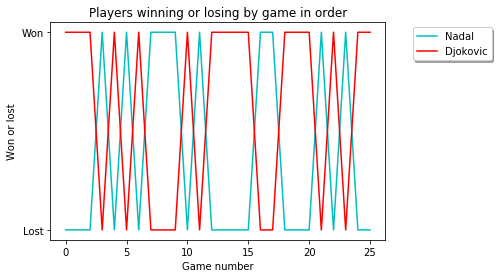

In [141]:
df_points['score']

# split the string by ", "
# take the first index
# split that string by ":"
# create an array for each player
# iterate through all of these and keep track of the prevous
# when you notice one changes :
# append the values 0 or 1 to mark lost or won

djok = []
nadal = []
last_score = None
for event in df_points['score']:
    current_score = event.split(', ')[0].split(' ')[-1]
    if last_score == None:
        last_score = current_score
    if current_score != last_score:
        if current_score[0] > last_score[0]:
            djok.append(1)
            nadal.append(0)
        else:
            djok.append(0)
            nadal.append(1)
    last_score = current_score

plt.plot([i for i in range(len(nadal))], ['Won' if num == 1 else 'Lost' for num in nadal], color='c', label='Nadal')
plt.plot([i for i in range(len(djok))], ['Won' if num == 1 else 'Lost' for num in djok], color='r', label='Djokovic')
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1), shadow=True, ncol=1)
plt.xlabel('Game number')
plt.ylabel('Won or lost')
plt.title('Players winning or losing by game in order')

### This graph is difficult to analyze at first
### If you look at the gaps you can see win streaks

In [108]:
def one_zero_list_to_accumulation(lst):
    tot = 0
    output_list = []
    for num in lst:
        tot += num
        output_list.append(tot)
    return output_list

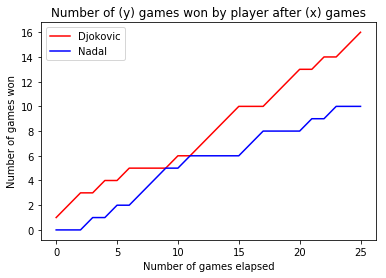

In [138]:
plt.plot([i for i in range(len(djok))], one_zero_list_to_accumulation(djok), color='r', label='Djokovic')
plt.plot([i for i in range(len(nadal))], one_zero_list_to_accumulation(nadal), color='b', label='Nadal')
plt.title('Number of (y) games won by player after (x) games')
plt.xlabel('Number of games elapsed')
plt.ylabel('Number of games won')
plt.legend()

In [142]:
# plot the distribution of elapsed time per rally
# make it normal
# find out 68, 95, 99.7s
# see how the average 

In [145]:
# courtesy of @jshams
def find_remove_outliers_iqr(data_sample):
    if len(data_sample) < 2:
        return data_sample
    '''calculate interquartile range'''
    q1, q3 = np.percentile(data_sample, 25) , np.percentile(data_sample, 75)
    iqr = q3 - q1
    # scipy.stats.iqr(data_sample)
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    data_without_outliers = [data for data in data_sample if data > lower and data < upper]
    return data_without_outliers

# courtesy of @jshams
def create_normal_distribution(bdata):
    if len(bdata) < 2:
        return bdata
    data = find_remove_outliers_iqr(bdata)
    normal_distribution = []
    for _ in range(1000):
        # chose 30 random points without replacement
        size = 30 if len(data) > 30 else len(data) // 2
        picks = np.random.choice(a = data, replace=False, size = size)
        # add the mean of those points to our distribution
        normal_distribution.append(np.mean(picks))
    return normal_distribution

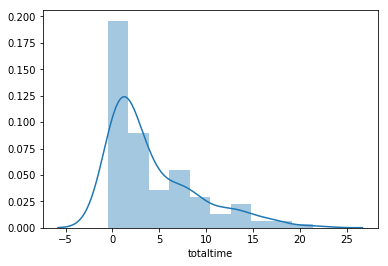

In [143]:
sns.distplot(df_points['totaltime'])

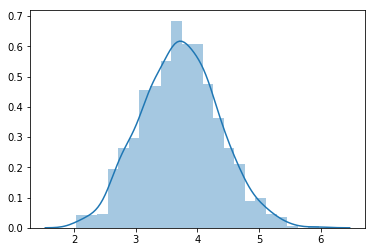

In [163]:
normal_dist = create_normal_distribution(df_points['totaltime'])
sns.distplot(normal_dist)

In [171]:
mean = np.mean(normal_dist)
std = np.std(normal_dist)
mean , std

(3.71755733332569, 0.6267588411267921)

In [169]:
def compute_cdf_one_line(lst, threshold):
    return len(list(filter(lambda x: x < threshold, lst))) / len(lst)

def calculate_pdf(lst, start, end):
    return abs(compute_cdf_one_line(lst, end) - compute_cdf_one_line(lst, start))

In [175]:
calculate_pdf(normal_dist, mean -  1 * std, mean + 1 * std)

0.6829999999999999

### The mean time for a rally is 3.72 seconds
### The standard deviation is 0.63 seconds
### This means that 
    - 68% of rallies are between 3.09 seconds and 4.35 seconds
    - 95% of rallies are between 2.46 seconds and 4.98 seconds
    - 99.7% of rallies are between 1.83 seconds and 5.61 seconds